# **Comparing Intracranial Access Efficacy of the Hubly Drill vs. Hand-Crank Drill through Conducting Survival Analysis of Patient Length of Stay in ICU**

**by Casey Grage**

## **Background**

**Problem:** Patients with hydrocephalus, traumatic brain injury, intracranial hemorrhage, cancers of the nervous system, brain tumors, epilepsy, and subdural hematomas often undergo surgical treatments which rely on intracranial access. Intracranial access today is performed both inside (180,000 procedures U.S. annual) and outside (20,000 U.S. annual) of the operating room. The current bedside procedure relies on an inaccurate, hand-crank drill deficient of any safety features. This shortcoming is manifested by the 40% misplacement rate of catheters during intracranial access procedures and the 3-attempt average for functional catheter placement. 50% of bedside and 10% of operating room intracranial access procedures yield patients’ suffering from infection, hemorrhage, stroke, neurological injury, and death. Our company is solving the problem of high failure rates for intracranial access procedures both inside and outside of the operating room.

**Solution:**
Hubly Surgical is a cranial and orthopedic platform tech drilling solution. We are first advancing intracranial access, for which 205,000 life-saving procedures are performed U.S. annual...with 20% failure. The Hubly Drilling System is designed for safety, saving lives and hospitals billions through reducing complications. Our products follow a Class II 510K regulatory pathway, and we’re currently in cadaver studies. Hubly is run by neurosurgeon serial entrepreneurs and lifelong medical device engineers. We are also partnered with Northwestern and Stanford Hospitals for testing and piloting our solution.

The patent-pending Hubly Drilling System - innovative both at the bedside and in the OR - includes (1) automatic, electrical plunge prevention; (2) battery power — rather than wired, electric power as in the operating room; (3) hardware catheter guidance utilizing the proven Ghajar guide technique, which has been proven to facilitate accurate freehand placement; and (4) unique drill bits which provide additional mechanical plunge prevention.


**Study:** We are doing first in-patient pilots with Dr. Juan Felipe Huidobro at Van Buren Hospital in Valparaíso, Chile. On average they have 12 EVDs performed each month. We expect half of these procedures to be performed with the Hubly Drill. Therefore, over the course of 6 months we expect about 36 procedures to be performed with the Hubly Drill compared giving us an $n=36$. It will be about a year and a half before we will have data from 100 patients who have undergone the Hubly drill and 100 control patients.

The data we have access to will be:
(a) deidentified patient demographics
(b) user testimonial
(c) patient ICU length of stay
(d) pre-op MRI/CT Scans
(e) post-op MRI/CT Scans
(f) patient readmission

From this data we can retrieve the following numerical data points:
 - Sex (a)
 - Age (a)
 - Distance of drill plunge (b)
 - Procedure length of time (b)
 - Patient ICU length of stay "LOS" in days (c)
 - Change in damaged area pre vs. post-op (d) & (e)

And we can compare this extrapolated data with standard control groups using (a).

**Project Purpose:** I am creating a model in advance to analyze the data collected from these pilots. First, I want to learn whether the patients who undergo the Hubly drill have different length of stays in the ICU than patients who undergo the current drill. This analysis will determine Hubly's cost-savings value to hospitals, and more importantly, will be an indication of Hubly's having improved outcomes for patients. To create this model prior to collecting real data, I have used [relevant medical studies](https://drive.google.com/file/d/1lVnVEpTwhXMy933svP1RMP5DbmwJJfEM/view?usp=sharing) and random generators to create a database of 200 hypothetical patients.

**Future Development:** Not in this present project, but in the future, I would like to analyze the influence of each covariate [Sex, Age, Distance of drill plunge, Procedure length of time] on the conditional variables: `Length of Stay` and `Change in damaged area pre vs. post-op`. I will of course, also run a simple logistic regression to determine if Hubly patients have a different `Change in damaged area pre vs. post-op` compared to the control patients.

## **Methods**


For this project, I want to find out what the hospital/ICU Length of Stay "LOS" likliehood is for a patient who underwent a Hubly drill vs. control drill. Therefore, I am going to use survival analysis, whereby the 'event' is a patient leaving the hospital, and the 'survival duration' is the patient's length of stay in the ICU. Here is the math behind survival analysis:

From (Havard, 2019), Assume that time is discrete with values $0=\tau_{0}<\tau_{1}<\ldots$. Let $\mathbb{T}=\left\{\tau_{1}, \tau_{2}, \ldots\right\}$ be the set of all positive $\tau_{j}$. The time that an event (in our case, patient release from the hospital) occurs is denoted $T^{*} \in \mathbb{T}$.

Our goal is to model the distribution of such event times, which I will call DURATIONS. Durations here are equal to patient length of stay (LOS). We can hence define:

Probability mass function: $f\left(\tau_{j}\right)=\mathrm{P}\left(T^{*}=\tau_{j}\right)$

Survival function: $ S\left(\tau_{j}\right)=\mathrm{P}\left(T^{*}>\tau_{j}\right)=\sum_{k>j} f\left(\tau_{k}\right) $


In survival analysis, models are often expressed in terms of the hazard function rather than the PMF. For discrete time, the hazard is defined as
$$
h\left(\tau_{j}\right)=\mathrm{P}\left(T^{*}=\tau_{j} \mid T^{*}>\tau_{j-1}\right)=\frac{f\left(\tau_{j}\right)}{S\left(\tau_{j-1}\right)}=\frac{S\left(\tau_{j-1}\right)-S\left(\tau_{j}\right)}{S\left(\tau_{j-1}\right)}
$$

Thereofre, we can now define the following in terms of the hazard:

Probability mass function: $f\left(\tau_{j}\right)=h\left(\tau_{j}\right) S\left(\tau_{j-1}\right)$


Survival function: $S\left(\tau_{j}\right)=\left[1-h\left(\tau_{j}\right)\right] S\left(\tau_{j-1}\right) =\prod_{k=1}^{j}\left[1-h\left(\tau_{k}\right)\right]$

For this project, I am going to use the python package `pycox`, which is built on the torchtuples package for training `PyTorch` models. For survival analysis, the `Event` space is 0 to 1, meaning it is a binary-truncated Poisson process. In a regular Poisson process, the integer values we are working with can count indefinitely high, so in that sense, survival analysis is fundamentally more simpler. The real cleverness is the hazard functions that are used to create metrics. I am going to use the following Discrete-Time Model hazard functions to create metrics about my data:


1. **Logistic-Hazard** parametrizes the discrete hazards and optimizes the survival (LOS) likelihood.

2. **PMF** parametrizes the probability mass function and optimizes survival (LOS) likelihood. It is the foundation of DeepHit and MTLR.

3. **DeepHit** is a PMF method with a loss for improved ranking that can handle competing risks.

4. The (Neural) **Multi-Task Logistic Regression** is a PMF methods proposed by (Yu, 2011) and (Fotso, 2018).

The metrics that arise from these `survivalmodels` are concordance, brier score, and negative binomial log-likelihood, and their integrated variations. In this code, they will be expressed through the following variables:

Evaluation Metric | Description
--- | ---
`concordance_td` | Concordance is simply the fraction of pairs for which the predictive model is correct. This time-dependent concordance is just evaluated at each event time.
`brier_score` | The IPCW Brier score (inverse probability of censoring weighted Brier score).
`nbll` | The IPCW (negative) binomial log-likelihood.
`integrated_brier_score` | The integrated IPCW Brier score. Numerical integration of the `brier_score`.
`integrated_nbll` | The integrated IPCW (negative) binomial log-likelihood. Numerical integration of the `nbll`.

**Brier Score Explained**

From (Fotso, 2018), Brier score is used to evaluate accuracy of a predicted survival function at a given time $t$. Brier score hence represents the average squared distances between the observed survival status and the predicted survival probability and is always a number between 0 and 1 , with 0 being the best possible value. Read as: LOWER BRIER SCORE MEANS A BETTER MODEL.

Some syntax: given a dataset of $N$ samples, $\forall i \in [[ 1, N ]],\left(\vec{x}_{i}, \delta_{i}, T_{i}\right)$ is the format of a datapoint, and the predicted survival function is $\hat{S}\left(t, \vec{x}_{i}\right), \forall t \in \mathbb{R}^{+}$:

The Brier score can be calculated such that:
$$
B S(t)=\frac{1}{N} \sum_{i=1}^{N}\left(\mathbb{1}_{T_{i}>t}-\hat{S}\left(t, \vec{x}_{i}\right)\right)^{2}
$$

And the Integrated Brier Score (IBS) provides an overall calculation of the model performance at all available times.
$$
\mathrm{IBS}=\frac{1}{\max \left(T_{i}\right)} \int_{0}^{\max \left(T_{i}\right)} B S(t) d t
$$

**Negative Binomial Log-Likelihood Explained**

From (Havard, 2019), minimizing the mean negative log-likelihood is shown by:

$$
\operatorname{loss}=-\frac{1}{n} \sum_{i=1}^{n}\left(d_{i} \log \left[f\left(t_{i} \mid \mathbf{x}_{i}\right)\right]+\left(1-d_{i}\right) \log \left[S\left(t_{i} \mid \mathbf{x}_{i}\right)\right]\right)
$$

where there are $n$ independent patients, each with covariates $\mathbf{x}_{i}$, length of stay $t_{i}$, and hospital release $d_{i}$.

A useful alternative to the loss function is obtained by rewriting it in terms of the discrete hazards. In doing so, we can express the NBLL as:


$$
\begin{aligned}
\operatorname{loss} &=-\frac{1}{n} \sum_{i=1}^{n}\left(d_{i} \log \left[h\left(t_{i} \mid \mathbf{x}_{i}\right)\right]+\left(1-d_{i}\right) \log \left[1-h\left(t_{i} \mid \mathbf{x}_{i}\right)\right]+\sum_{j=1}^{\kappa\left(t_{i}\right)-1} \log \left[1-h\left(\tau_{j} \mid \mathbf{x}_{i}\right)\right]\right) \\
&=-\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{\kappa\left(t_{i}\right)}\left(y_{i j} \log \left[h\left(\tau_{j} \mid \mathbf{x}_{i}\right)\right]+\left(1-y_{i j}\right) \log \left[1-h\left(\tau_{j} \mid \mathbf{x}_{i}\right)\right]\right)
\end{aligned}
$$

where $\mathbf{y}_{i}=\left(y_{i 1}, \ldots, y_{i m}\right)$ is a vector of zeros with a single 1 at the event index $\kappa\left(t_{i}\right)$ when $t_{i}$, which indicates that an event happened AKA the patient was released from the hospital: $\left(d_{i}=1\right)$.



**Import Libraries**

Before we break down into these discrete methods, we need to import some code!

In [ ]:
! pip install pycox
! pip install sklearn-pandas
! pip install torchtuples
#! pip install --upgrade matplotlib

In [ ]:
import numpy as np
import pandas as pd

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pylab as plt

# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch # For building the networks
import torchtuples as tt # Some useful functions

from pycox.models import LogisticHazard
from pycox.models import PMF
from pycox.models import DeepHitSingle
from pycox.evaluation import EvalSurv
from pycox.models import MTLR

pd.options.mode.chained_assignment = None

In [ ]:
# Mount Google Drive account as an available drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Load and Process Data**

We load the EVD Sample Data set as a pandas DataFrame and split the data in in train, test and validation. The duration column gives the observed times and the event column contains indicators of whether the observation is an event (1) or a censored observation (0).

In [ ]:
#get all data

mydata_csv = "/content/gdrive/My Drive/Gap Year 3 (2021-22)/JHU Math/Colab Notebooks/EVD Sample Data.csv"
mydata = pd.read_csv(mydata_csv).head(200)

print(mydata.shape)

(200, 10)


In [ ]:
#create the dataframe where we will store our metrics

mymetrics = pd.DataFrame(columns = ['Logistic Hazard', 'PMF', 'DeepHitSingle', 'MTLR'],
                         index = ['Hubly Concordance', 'Ctrl Concordance',
                                  'Hubly Integrated Brier Score', 'Ctrl Integrated Brier Score',
                                  'Hubly Integrated NBLL', 'Ctrl Integrated NBLL'])

display(mymetrics)

,Logistic Hazard,PMF,DeepHitSingle,MTLR
Hubly Concordance,NaN,NaN,NaN,NaN
Ctrl Concordance,NaN,NaN,NaN,NaN
Hubly Integrated Brier Score,NaN,NaN,NaN,NaN
Ctrl Integrated Brier Score,NaN,NaN,NaN,NaN
Hubly Integrated NBLL,NaN,NaN,NaN,NaN
Ctrl Integrated NBLL,NaN,NaN,NaN,NaN


### Feature transforms

The EVD Sample Data dataset has  8 covariates. I will standardize the 5 numerical covariates, switch the `Sex` covariate to binary, and leave the other binary covariates, `Hubly drill? Y/N` and `Events` as is.
Note that PyTorch require variables of type `'float32'`.

Here we use the `sklearn_pandas.DataFrameMapper`  to make feature mappers.

In [ ]:
display(mydata.dtypes)

Case No.                                         float64
Sex                                               object
Age (yrs)                                        float64
Hubly drill? Y/N                                 float64
Bone thickness (mm)                              float64
Drill Plunge (mm)                                float64
Drilling time (s)                                float64
Patient LOS (days)                               float64
Change in damaged area pre vs. post-op (mm^2)    float64
Events                                           float64
dtype: object

In [ ]:
cols_standardize = ['Age (yrs)', 'Bone thickness (mm)', 'Drill Plunge (mm)', 'Drilling time (s)', 'Patient LOS (days)']

m = {'M' : 1, 'F' : 0}
mydata['Sex'] = mydata['Sex'].map(m)

cols_leave = ['Sex', 'Hubly drill? Y/N']

standardize = [([col], StandardScaler()) for col in cols_standardize]
leave = [(col, None) for col in cols_leave]

x_mapper = DataFrameMapper(standardize + leave)

In [ ]:
#now I want to split the data into patients where Hubly was used and patients where Hubly was not used

hubly_mydata = mydata[mydata['Hubly drill? Y/N']==1]
ctrl_mydata = mydata[mydata['Hubly drill? Y/N']==0]

In [ ]:
hdf_train = hubly_mydata
hdf_test = hdf_train.sample(frac=0.2)
hdf_train = hdf_train.drop(hdf_test.index)
hdf_val = hdf_train.sample(frac=0.2)
hdf_train = hdf_train.drop(hdf_val.index)

hdf_train.head()

,Case No.,Sex,Age (yrs),Hubly drill? Y/N,Bone thickness (mm),Drill Plunge (mm),Drilling time (s),Patient LOS (days),Change in damaged area pre vs. post-op (mm^2),Events
0,1.0,1,2.0,1.0,5.59,0.12,10.0,6.0,6.401,1.0
2,3.0,1,11.0,1.0,5.01,0.00,13.0,10.0,9.499,1.0
4,5.0,1,59.0,1.0,4.92,0.04,20.0,23.0,22.828,0.0
10,11.0,1,5.0,1.0,4.32,0.20,22.0,5.0,6.168,1.0
12,13.0,1,65.0,1.0,4.75,0.34,10.0,11.0,13.245,1.0


In [ ]:
cdf_train = ctrl_mydata
cdf_test = cdf_train.sample(frac=0.2)
cdf_train = cdf_train.drop(cdf_test.index)
cdf_val = cdf_train.sample(frac=0.2)
cdf_train = cdf_train.drop(cdf_val.index)

cdf_train.head()

,Case No.,Sex,Age (yrs),Hubly drill? Y/N,Bone thickness (mm),Drill Plunge (mm),Drilling time (s),Patient LOS (days),Change in damaged area pre vs. post-op (mm^2),Events
3,4.0,1,75.0,0.0,5.01,5.77,70.0,14.0,59.659,1.0
11,12.0,1,3.0,0.0,4.32,5.33,53.0,14.0,56.208,1.0
13,14.0,1,66.0,0.0,4.75,3.69,78.0,15.0,44.045,1.0
15,16.0,1,45.0,0.0,3.76,3.67,97.0,16.0,44.984,1.0
21,22.0,1,59.0,0.0,5.55,4.59,89.0,10.0,46.165,1.0


In [ ]:
hx_train = x_mapper.fit_transform(hdf_train).astype('float32')
hx_val = x_mapper.transform(hdf_val).astype('float32')
hx_test = x_mapper.transform(hdf_test).astype('float32')

In [ ]:
cx_train = x_mapper.fit_transform(cdf_train).astype('float32')
cx_val = x_mapper.transform(cdf_val).astype('float32')
cx_test = x_mapper.transform(cdf_test).astype('float32')

## **Logistic Hazard**

The `LogisticHazard` is a discrete-time method, so this means it needs the event times to be discretized in order to be applied to continuous-time data. I'm essentially going to run this method on each the Hubly patient and the control drill patients, to compare survival predictions.


#### Label transforms

The survival methods require individual label transforms, so I have a `label_transform` for each method (for each Hubly vs. the control group). I also let `num_durations` define the size of the discretization grid. This means my network will have `num_durations` output nodes.

In [ ]:
num_durations = 10

In [ ]:
#hubly

h_labtrans = LogisticHazard.label_transform(num_durations)

h_get_target = lambda hdf: (hdf['Patient LOS (days)'].values, hdf['Events'].values)
hy_train = h_labtrans.fit_transform(*h_get_target(hdf_train))
hy_val = h_labtrans.transform(*h_get_target(hdf_val))

htrain = (hx_train, hy_train)
hval = (hx_val, hy_val)



h_durations_test, h_events_test = h_get_target(hdf_test)

In [ ]:
#ctrl

c_labtrans = LogisticHazard.label_transform(num_durations)

c_get_target = lambda cdf: (cdf['Patient LOS (days)'].values, cdf['Events'].values)
cy_train = c_labtrans.fit_transform(*c_get_target(cdf_train))
cy_val = c_labtrans.transform(*c_get_target(cdf_val))

ctrain = (cx_train, cy_train)
cval = (cx_val, cy_val)

c_durations_test, c_events_test = c_get_target(cdf_test)

The `labtrans.cuts` contains the discretization grid. This will later be used to obtain the correct time-scale for survival predictions. And now, `y_train` is a tuple with the indices of the discretized times, in addition to event indicators.

In [ ]:
h_labtrans.cuts

array([ 0.        ,  3.22222222,  6.44444444,  9.66666667, 12.88888889,
       16.11111111, 19.33333333, 22.55555556, 25.77777778, 29.        ])

In [ ]:
c_labtrans.cuts

array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36.])

#### **Neural Net**

I'm going to make a neural net using `torch` as well as the `MLPVanilla` provided by `torchtuples`. The net I use is an MLP with two hidden layers, each with 32 nodes, ReLU activations, and `out_features` output nodes. I also have batch normalization and dropout between the layers.

In [ ]:
num_nodes = [32, 32]
h_out_features = h_labtrans.out_features
c_out_features = c_labtrans.out_features
batch_norm = True
dropout = 0.1

In [ ]:
#hubly

h_in_features = hx_train.shape[1]
h_net = tt.practical.MLPVanilla(h_in_features, num_nodes, h_out_features, batch_norm, dropout)

In [ ]:
#ctrl

c_in_features = cx_train.shape[1]
c_net = tt.practical.MLPVanilla(c_in_features, num_nodes, c_out_features, batch_norm, dropout)

#### **Training the Model**

To train the model I need to define an optimizer. I'm choosing to use one from `tt.optim`, which is built on top of the `torch` optimizers, but with some added functionality (such as not requiring `net.parameters()` as input and the `model.lr_finder` for finding suitable learning rates). I will here use the `Adam` optimizer with learning rate 0.01.

I also set `duration_index` which connects the output nodes of the network the the discretization times. This is only useful for prediction and does not affect the training procedure.

In [ ]:
h_model = LogisticHazard(h_net, tt.optim.Adam(0.01), duration_index=h_labtrans.cuts)
c_model = LogisticHazard(c_net, tt.optim.Adam(0.01), duration_index=c_labtrans.cuts)

Next, I set the `batch_size` and the number of training `epochs`. I also include the `EarlyStopping` callback to stop training once the validation loss stops improving!

In [ ]:
batch_size = 256
epochs = 100
callbacks = [tt.cb.EarlyStopping()]

NOW, I can train the network while the log object keeps track of the training progress.

In [ ]:
h_log = h_model.fit(hx_train, hy_train, batch_size, epochs, callbacks, val_data=hval)

0:	[0s / 0s],		train_loss: 3.5378,	val_loss: 3.3672
1:	[0s / 0s],		train_loss: 3.3055,	val_loss: 3.2959
2:	[0s / 0s],		train_loss: 3.1009,	val_loss: 3.2417
3:	[0s / 0s],		train_loss: 2.9443,	val_loss: 3.1952
4:	[0s / 0s],		train_loss: 2.7532,	val_loss: 3.1415
5:	[0s / 0s],		train_loss: 2.6820,	val_loss: 3.0834
6:	[0s / 0s],		train_loss: 2.5422,	val_loss: 3.0273
7:	[0s / 0s],		train_loss: 2.3225,	val_loss: 2.9695
8:	[0s / 0s],		train_loss: 2.1798,	val_loss: 2.9189
9:	[0s / 0s],		train_loss: 2.1324,	val_loss: 2.8650
10:	[0s / 0s],		train_loss: 2.0057,	val_loss: 2.8052
11:	[0s / 0s],		train_loss: 1.9605,	val_loss: 2.7412
12:	[0s / 0s],		train_loss: 1.8034,	val_loss: 2.6765
13:	[0s / 0s],		train_loss: 1.7908,	val_loss: 2.6021
14:	[0s / 0s],		train_loss: 1.7009,	val_loss: 2.5329
15:	[0s / 0s],		train_loss: 1.6068,	val_loss: 2.4599
16:	[0s / 0s],		train_loss: 1.4812,	val_loss: 2.3863
17:	[0s / 0s],		train_loss: 1.4464,	val_loss: 2.3133
18:	[0s / 0s],		train_loss: 1.3868,	val_loss: 2.2478
19:

In [ ]:
c_log = c_model.fit(cx_train, cy_train, batch_size, epochs, callbacks, val_data=cval)

0:	[0s / 0s],		train_loss: 3.3801,	val_loss: 3.1606


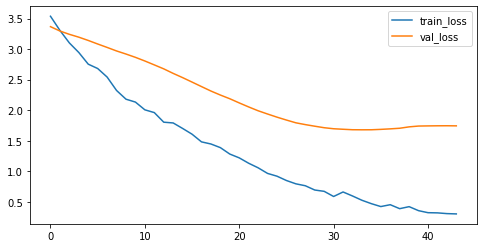

In [ ]:
figsize(8, 4)

_ = h_log.plot()

After termination, my `EarlyStopping` callback loads the best performing model (in terms of validation loss). We can verify this by comparing the minimum validation loss to the validation score of the trained model.

In [ ]:
h_log.to_pandas().val_loss.min()

1.678792953491211

In [ ]:
c_log.to_pandas().val_loss.min()

3.1606428623199463

In [ ]:
h_model.score_in_batches(hval)
c_model.score_in_batches(cval)

{'loss': 3.1512889862060547}

#### **Prediction**

Now I must get the survival (AKA Length of Stay) estimates for the test set! I'll do this with `model.predict_surv_df` which returns the survival estimates as a dataframe.

In [ ]:
lh_surv = h_model.predict_surv_df(hx_test)
lc_surv = c_model.predict_surv_df(cx_test)

First, I plot the Length of Stay estimates for the first 10 predictions that my model made! I have decided to only plot 10 rather than all of the predictions, because in the latter case, the reader is unable to distinguish where the greatest areas of overlap are. Simultaneously, I want to plot as many predictions as possible to give the reader a sense of variability or lack thereof for the predictions. I have decided 10 predictions is the maximum number of predictions that the plot can graph which the reader can still distinguish.

The x-axis represents time, measured in days, spent in the ICU. And the y-axis measures probability that the patient is still in the ICU. The time scale here is correct as a result of setting `model.duration_index` to be the grid points :)

Because I've only defined the LOS estimates 7 times in the discretization grid, the LOS estimates becomes a step function.

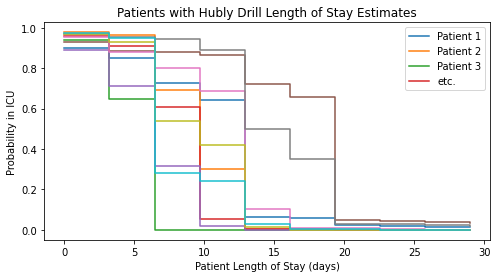

In [ ]:
lh_surv.iloc[:, :10].plot(drawstyle='steps-post')
plt.ylabel('Probability in ICU')
_ = plt.xlabel('Patient Length of Stay (days)')
_ = plt.title('Patients with Hubly Drill Length of Stay Estimates')
_ = plt.legend(['Patient 1', 'Patient 2', 'Patient 3', 'etc.'])

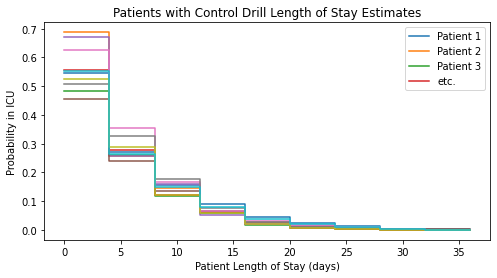

In [ ]:
lc_surv.iloc[:, :10].plot(drawstyle='steps-post')
plt.ylabel('Probability in ICU')
_ = plt.xlabel('Patient Length of Stay (days)')
_ = plt.title('Patients with Control Drill Length of Stay Estimates')
_ = plt.legend(['Patient 1', 'Patient 2', 'Patient 3', 'etc.'])

To make this NOT a step function, I can use linear interpolation (constant density interpolation) via the `interpolate` method. I just need to choose how many points I want to replace each grid point with! I'll use 10 per grid point.

I am now going to plot the Length of Stay estimates for the first 20 model predictions vs. the likelihood that the patient is still in ICU! This time, to compare Hubly vs. control directly, I'm going to adjust the X and Y axes to predetermined ranges rather than letting the `model.duration_index` be the grid points.

In [ ]:
lh_surv = h_model.interpolate(10).predict_surv_df(hx_test)
lc_surv = c_model.interpolate(10).predict_surv_df(cx_test)

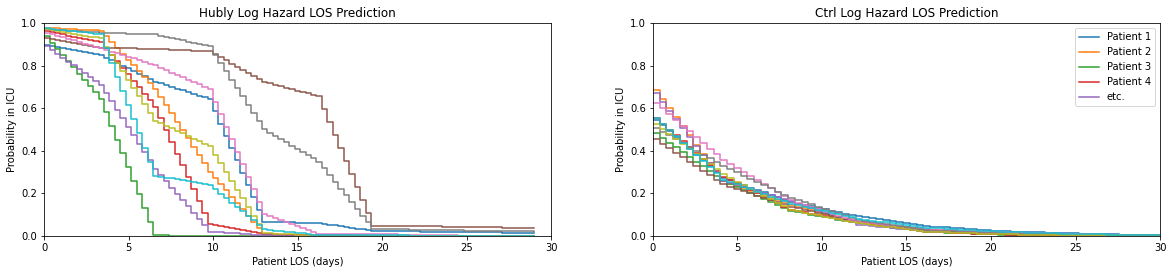

In [ ]:
figsize(20, 18)

ax1 = plt.subplot(421)
ax1.plot(lh_surv.iloc[:, :10], drawstyle='steps-post')
ax1.set_ylabel('Probability in ICU')
ax1.set_xlabel('Patient LOS (days)')
ax1.set_title('Hubly Log Hazard LOS Prediction')
ax1.set_xlim([0,30])
ax1.set_ylim([0,1.0])


ax2 = plt.subplot(422)
ax2.plot(lc_surv.iloc[:, :10], drawstyle='steps-post')
ax2.set_ylabel('Probability in ICU')
ax2.set_xlabel('Patient LOS (days)')
ax2.set_title('Ctrl Log Hazard LOS Prediction')
ax2.set_xlim([0,30])
ax2.set_ylim([0,1.0])
ax2.legend(['Patient 1','Patient 2', 'Patient 3','Patient 4','etc.'], loc='upper right')

plt.show()

With the dummy data, the Hubly drill patients have slightly lesser lengths of stay than control patients, through the Logistic Hazard method.


#### **Evaluation**

The `EvalSurv` class contains some useful evaluation criteria for time-to-event prediction.
Setting `censor_surv = 'km'` shows that I want to use Kaplan-Meier for estimating the censoring distribution.

For each method / Hubly drill vs. control, I'm going to log each metric into a dataframe for evaluation at the end. Since the metrics won't make sense until we can compare all of them, I won't bother displaying the table until the conclusion.


From (Fotso, 2018), the Kaplan-Meier "KM" estimator is a non-parametric model used to compute the survival function $\hat{S}_{K M}(t)$ of a homogeneous cohort. The definition is as follows:


Given $N$ units in a cohort, let's assume that there are $J$ distinct actual event times such that $t_{1}<t_{2}<\ldots<t_{J}$ with $J \leq N$, then the survival function $\hat{S}_{K M}(t)$ is given by:
$$
\hat{S}_{\mathrm{KM}}(t)=\prod_{t_{j} \leq t}\left(1-\frac{d_{j}}{r_{j}}\right)
$$
where:
- $d_{j}$ is the number of units that experience an event at $t_{j}$.
- $r_{j}$ is the number of units at risk (units that haven't experienced the event or haven't been censored yet) in the time interval $\left[t_{j-1}, t_{j}\right)$.

In [ ]:
h_ev = EvalSurv(lh_surv, h_durations_test, h_events_test, censor_surv='km')
c_ev = EvalSurv(lc_surv, c_durations_test, c_events_test, censor_surv='km')

**Concordance**

I'll start with the event-time concordance by [Antolini et al. 2005](https://onlinelibrary.wiley.com/doi/10.1002/sim.2427).

In [ ]:
mymetrics.at['Hubly Concordance', 'Logistic Hazard'] = h_ev.concordance_td('antolini')
mymetrics.at['Ctrl Concordance', 'Logistic Hazard'] = c_ev.concordance_td('antolini')

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


**Brier Score**

Now, I can plot the the IPCW Brier score for a given set of times. I'll use 100 time-points between the min and max duration in the test set. The score becomes unstable for the highest times, so WE COMMONLY IGNORE THE RIGHT-HAND SIDE OF THE GRAPH.

Recall that the brier score measures the accuracy of the model at each given time — in our case, this given time is patient length of stay measured in days.

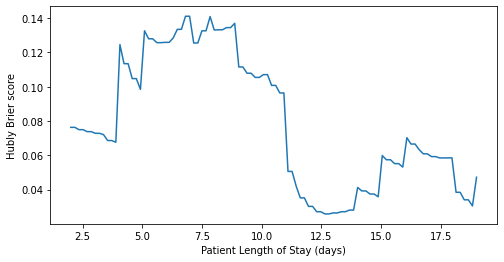

In [ ]:
#Hubly

figsize(8, 4)

h_time_grid = np.linspace(h_durations_test.min(), h_durations_test.max(), 100)

h_ev.brier_score(h_time_grid).plot()
plt.ylabel('Hubly Brier score')
_ = plt.xlabel('Patient Length of Stay (days)')

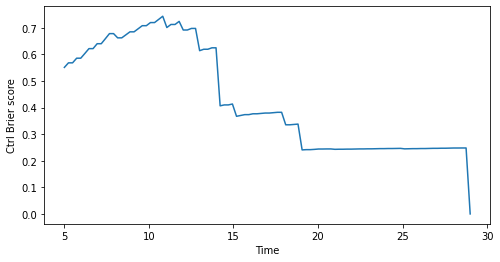

In [ ]:
#Ctrl

c_time_grid = np.linspace(c_durations_test.min(), c_durations_test.max(), 100)

c_ev.brier_score(c_time_grid).plot()
plt.ylabel('Ctrl Brier score')
_ = plt.xlabel('Time')

**Negative binomial log-likelihood**

Now, I'll plot the NBLL in the same way.

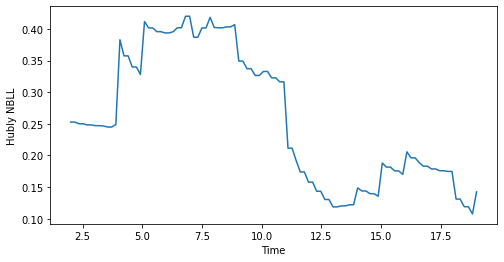

In [ ]:
#Hubly

h_ev.nbll(h_time_grid).plot()
plt.ylabel('Hubly NBLL')
_ = plt.xlabel('Time')

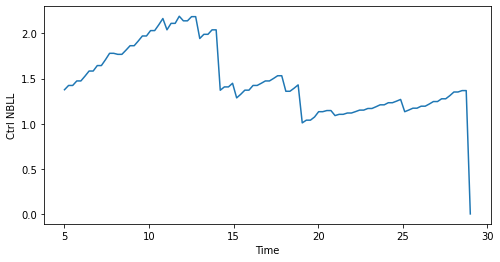

In [ ]:
#Ctrl

c_ev.nbll(c_time_grid).plot()
plt.ylabel('Ctrl NBLL')
_ = plt.xlabel('Time')

**Integrated scores**

The two time-dependent scores above can be integrated over time to produce a single score [Graf et al. 1999](https://onlinelibrary.wiley.com/doi/abs/10.1002/%28SICI%291097-0258%2819990915/30%2918%3A17/18%3C2529%3A%3AAID-SIM274%3E3.0.CO%3B2-5). I do this by integration over a pre-defined `time_grid`.

In [ ]:
mymetrics.at['Hubly Integrated Brier Score', 'Logistic Hazard'] = h_ev.integrated_brier_score(h_time_grid)
mymetrics.at['Ctrl Integrated Brier Score', 'Logistic Hazard'] = c_ev.integrated_brier_score(c_time_grid)

In [ ]:
mymetrics.at['Hubly Integrated NBLL', 'Logistic Hazard'] = h_ev.integrated_nbll(h_time_grid)
mymetrics.at['Ctrl Integrated NBLL', 'Logistic Hazard'] = c_ev.integrated_nbll(c_time_grid)

## **PMF Method**

I'm now going to repeat exactly what I did above with Logistic Hazard but with PMF!

From (Havard, 2019), as for the hazards, the PMF represents probabilities $f\left(\tau_{j} \mid \mathbf{x}\right) \in[0,1]$, but, contrary to the conditional probabilities that define the hazard, we now require the $\mathrm{PMF}$ to sum to $1 .$ As we only observe event times in $\mathbb{T}_{C}$, we fulfill this requirement indirectly through the probability of surviving past $\tau_{m}$, which can be expressed by:
$$
\sum_{k=1}^{m} f\left(\tau_{k} \mid \mathbf{x}\right)+S\left(\tau_{m} \mid x\right)=1
$$

#### **Label transforms**

In [ ]:
num_durations = 10

In [ ]:
#hubly

h_labtrans = PMF.label_transform(num_durations)

h_get_target = lambda hdf: (hdf['Patient LOS (days)'].values, hdf['Events'].values)
hy_train = h_labtrans.fit_transform(*h_get_target(hdf_train))
hy_val = h_labtrans.transform(*h_get_target(hdf_val))

htrain = (hx_train, hy_train)
hval = (hx_val, hy_val)



h_durations_test, h_events_test = h_get_target(hdf_test)

In [ ]:
#ctrl

c_labtrans = PMF.label_transform(num_durations)

c_get_target = lambda cdf: (cdf['Patient LOS (days)'].values, cdf['Events'].values)
cy_train = c_labtrans.fit_transform(*c_get_target(cdf_train))
cy_val = c_labtrans.transform(*c_get_target(cdf_val))

ctrain = (cx_train, cy_train)
cval = (cx_val, cy_val)

c_durations_test, c_events_test = c_get_target(cdf_test)

In [ ]:
h_labtrans.cuts

array([ 0.        ,  3.22222222,  6.44444444,  9.66666667, 12.88888889,
       16.11111111, 19.33333333, 22.55555556, 25.77777778, 29.        ])

In [ ]:
c_labtrans.cuts

array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36.])

#### **Neural Net**

Now, again with $\phi(\mathbf{x}) \in \mathbb{R}^{m}$ denoting a neural network, the PMF can be expressed as
$$
f\left(\tau_{j} \mid \mathbf{x}\right)=\frac{\exp \left[\phi_{j}(\mathbf{x})\right]}{1+\sum_{k=1}^{m} \exp \left[\phi_{k}(\mathbf{x})\right]}, \quad \text { for } j=1, \ldots, m .
$$

In [ ]:
num_nodes = [32, 32]
h_out_features = h_labtrans.out_features
c_out_features = c_labtrans.out_features
batch_norm = True
dropout = 0.1

In [ ]:
#hubly

h_in_features = hx_train.shape[1]
h_net = tt.practical.MLPVanilla(h_in_features, num_nodes, h_out_features, batch_norm, dropout)

In [ ]:
#ctrl

c_in_features = cx_train.shape[1]
c_net = tt.practical.MLPVanilla(c_in_features, num_nodes, c_out_features, batch_norm, dropout)

#### **Training the Model**

In [ ]:
h_model = PMF(h_net, tt.optim.Adam(0.01), duration_index=h_labtrans.cuts)
c_model = PMF(c_net, tt.optim.Adam(0.01), duration_index=c_labtrans.cuts)

In [ ]:
batch_size = 256
epochs = 100
callbacks = [tt.cb.EarlyStopping()]

In [ ]:
h_log = h_model.fit(hx_train, hy_train, batch_size, epochs, callbacks, val_data=hval)

0:	[0s / 0s],		train_loss: 2.3677,	val_loss: 2.4510
1:	[0s / 0s],		train_loss: 2.2246,	val_loss: 2.4516
2:	[0s / 0s],		train_loss: 1.9915,	val_loss: 2.4646
3:	[0s / 0s],		train_loss: 1.8303,	val_loss: 2.4721
4:	[0s / 0s],		train_loss: 1.6943,	val_loss: 2.4814
5:	[0s / 0s],		train_loss: 1.5849,	val_loss: 2.4969
6:	[0s / 0s],		train_loss: 1.5067,	val_loss: 2.5087
7:	[0s / 0s],		train_loss: 1.3979,	val_loss: 2.5247
8:	[0s / 0s],		train_loss: 1.3129,	val_loss: 2.5360
9:	[0s / 0s],		train_loss: 1.2424,	val_loss: 2.5403
10:	[0s / 0s],		train_loss: 1.1572,	val_loss: 2.5497


In [ ]:
c_log = c_model.fit(cx_train, cy_train, batch_size, epochs, callbacks, val_data=cval)

0:	[0s / 0s],		train_loss: 2.3478,	val_loss: 2.5956


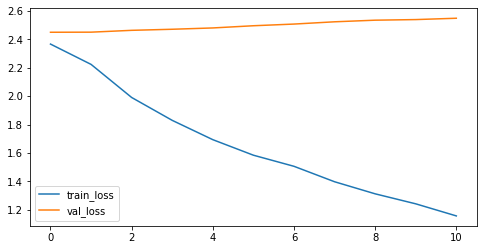

In [ ]:
_ = h_log.plot()

In [ ]:
h_log.to_pandas().val_loss.min()

2.4509997367858887

In [ ]:
c_log.to_pandas().val_loss.min()

2.5956268310546875

In [ ]:
h_model.score_in_batches(hval)
c_model.score_in_batches(cval)

{'loss': 2.6979150772094727}

#### **Prediction**

In [ ]:
ph_surv = h_model.predict_surv_df(hx_test)
pc_surv = c_model.predict_surv_df(cx_test)

In [ ]:
ph_surv = h_model.interpolate(10).predict_surv_df(hx_test)
pc_surv = c_model.interpolate(10).predict_surv_df(cx_test)

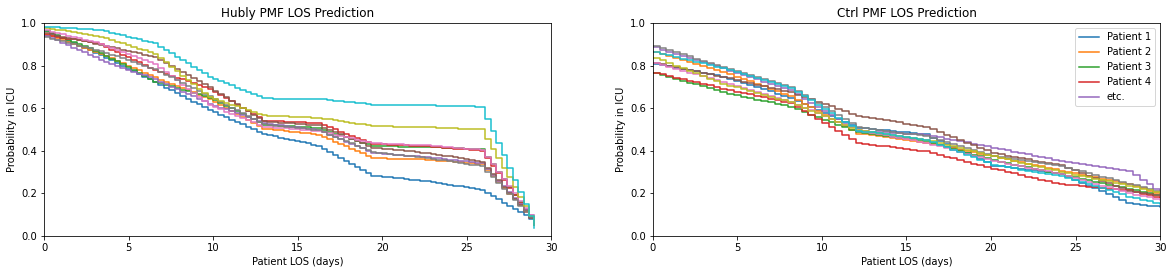

In [ ]:
figsize(20, 18)

ax3 = plt.subplot(423)
ax3.plot(ph_surv.iloc[:, :10], drawstyle='steps-post')
ax3.set_ylabel('Probability in ICU')
ax3.set_xlabel('Patient LOS (days)')
ax3.set_title('Hubly PMF LOS Prediction')
ax3.set_xlim([0,30])
ax3.set_ylim([0,1.0])



ax4 = plt.subplot(424)
ax4.plot(pc_surv.iloc[:, :10], drawstyle='steps-post')
ax4.set_ylabel('Probability in ICU')
ax4.set_xlabel('Patient LOS (days)')
ax4.set_title('Ctrl PMF LOS Prediction')
ax4.set_xlim([0,30])
ax4.set_ylim([0,1.0])
ax4.legend(['Patient 1','Patient 2', 'Patient 3','Patient 4','etc.'], loc='upper right')

plt.show()

The Hubly drill patients have significantly lesser lengths of stay than control patients, through the PMF method.

#### **Evaluation**

In [ ]:
h_ev = EvalSurv(ph_surv, h_durations_test, h_events_test, censor_surv='km')
c_ev = EvalSurv(pc_surv, c_durations_test, c_events_test, censor_surv='km')

**Concordance**

In [ ]:
mymetrics.at['Hubly Concordance', 'PMF'] = h_ev.concordance_td('antolini')
mymetrics.at['Ctrl Concordance', 'PMF'] = c_ev.concordance_td('antolini')
display(mymetrics)

,Logistic Hazard,PMF,DeepHitSingle,MTLR
Hubly Concordance,0.853261,0.597826,NaN,NaN
Ctrl Concordance,0.64881,0.613095,NaN,NaN
Hubly Integrated Brier Score,0.0791265,NaN,NaN,NaN
Ctrl Integrated Brier Score,0.428325,NaN,NaN,NaN
Hubly Integrated NBLL,0.2579,NaN,NaN,NaN
Ctrl Integrated NBLL,1.48617,NaN,NaN,NaN


**Brier Score**

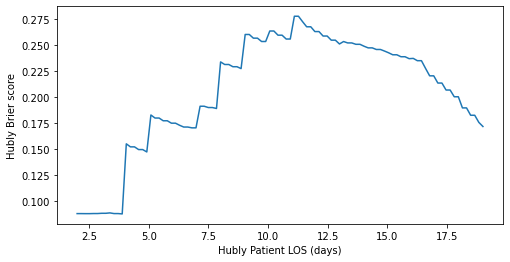

In [ ]:
#Hubly

figsize(8, 4)

h_time_grid = np.linspace(h_durations_test.min(), h_durations_test.max(), 100)

h_ev.brier_score(h_time_grid).plot()
plt.ylabel('Hubly Brier score')
_ = plt.xlabel('Hubly Patient LOS (days)')

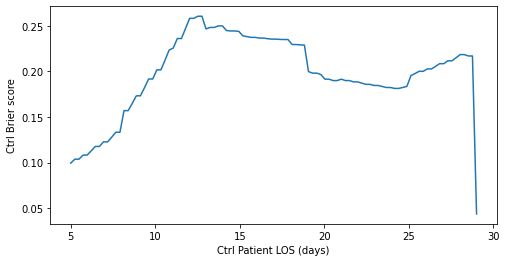

In [ ]:
#Ctrl

c_time_grid = np.linspace(c_durations_test.min(), c_durations_test.max(), 100)

c_ev.brier_score(c_time_grid).plot()
plt.ylabel('Ctrl Brier score')
_ = plt.xlabel('Ctrl Patient LOS (days)')

**Negative binomial log-likelihood**

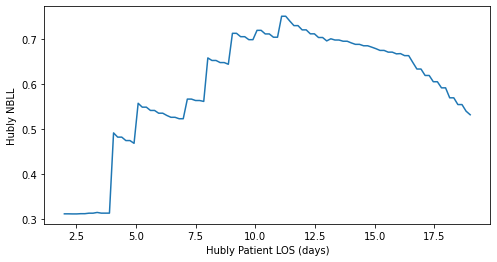

In [ ]:
#Hubly

h_ev.nbll(h_time_grid).plot()
plt.ylabel('Hubly NBLL')
_ = plt.xlabel('Hubly Patient LOS (days)')

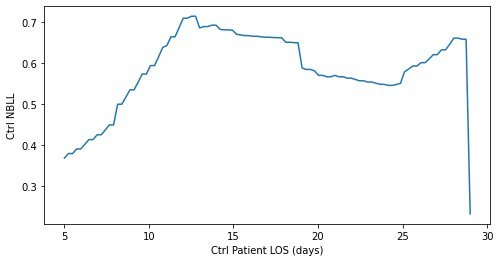

In [ ]:
#Ctrl

c_ev.nbll(c_time_grid).plot()
plt.ylabel('Ctrl NBLL')
_ = plt.xlabel('Ctrl Patient LOS (days)')

**Integrated scores**

In [ ]:
mymetrics.at['Hubly Integrated Brier Score', 'PMF'] = h_ev.integrated_brier_score(h_time_grid)
mymetrics.at['Ctrl Integrated Brier Score', 'PMF'] = c_ev.integrated_brier_score(c_time_grid)

In [ ]:
mymetrics.at['Hubly Integrated NBLL', 'PMF'] = h_ev.integrated_nbll(h_time_grid)
mymetrics.at['Ctrl Integrated NBLL', 'PMF'] = c_ev.integrated_nbll(c_time_grid)

display(mymetrics)

,Logistic Hazard,PMF,DeepHitSingle,MTLR
Hubly Concordance,0.853261,0.597826,NaN,NaN
Ctrl Concordance,0.64881,0.613095,NaN,NaN
Hubly Integrated Brier Score,0.0791265,0.206512,NaN,NaN
Ctrl Integrated Brier Score,0.428325,0.199111,NaN,NaN
Hubly Integrated NBLL,0.2579,0.596536,NaN,NaN
Ctrl Integrated NBLL,1.48617,0.589654,NaN,NaN


## **DeepHitSingle**

DeepHitSingle is a PMF method with a loss for improved ranking that can handle competing risks.

From (Kvamme, 2019), DeepHitSingle parameterizes the probability mass function (PMF) of the survival distribution. It then combines the log-likelihood of right-censored data with the ranking loss. This means DeepHitSingle typically has great discriminative performance while having ill calibrated survival estimates.

#### **Label transforms**

In [ ]:
num_durations = 10

In [ ]:
#hubly

h_labtrans = DeepHitSingle.label_transform(num_durations)

h_get_target = lambda hdf: (hdf['Patient LOS (days)'].values, hdf['Events'].values)
hy_train = h_labtrans.fit_transform(*h_get_target(hdf_train))
hy_val = h_labtrans.transform(*h_get_target(hdf_val))

htrain = (hx_train, hy_train)
hval = (hx_val, hy_val)



h_durations_test, h_events_test = h_get_target(hdf_test)

In [ ]:
#ctrl

c_labtrans = DeepHitSingle.label_transform(num_durations)

c_get_target = lambda cdf: (cdf['Patient LOS (days)'].values, cdf['Events'].values)
cy_train = c_labtrans.fit_transform(*c_get_target(cdf_train))
cy_val = c_labtrans.transform(*c_get_target(cdf_val))

ctrain = (cx_train, cy_train)
cval = (cx_val, cy_val)

c_durations_test, c_events_test = c_get_target(cdf_test)

In [ ]:
h_labtrans.cuts

array([ 0.        ,  3.22222222,  6.44444444,  9.66666667, 12.88888889,
       16.11111111, 19.33333333, 22.55555556, 25.77777778, 29.        ])

In [ ]:
c_labtrans.cuts

array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36.])

#### **Neural Net**

Now, again with $\phi(\mathbf{x}) \in \mathbb{R}^{m}$ denoting a neural network, the PMF can be expressed as
$$
f\left(\tau_{j} \mid \mathbf{x}\right)=\frac{\exp \left[\phi_{j}(\mathbf{x})\right]}{1+\sum_{k=1}^{m} \exp \left[\phi_{k}(\mathbf{x})\right]}, \quad \text { for } j=1, \ldots, m .
$$

In [ ]:
num_nodes = [32, 32]
h_out_features = h_labtrans.out_features
c_out_features = c_labtrans.out_features
batch_norm = True
dropout = 0.1

In [ ]:
#hubly

h_in_features = hx_train.shape[1]
h_net = tt.practical.MLPVanilla(h_in_features, num_nodes, h_out_features, batch_norm, dropout)

In [ ]:
#ctrl

c_in_features = cx_train.shape[1]
c_net = tt.practical.MLPVanilla(c_in_features, num_nodes, c_out_features, batch_norm, dropout)

#### **Training the Model**

In [ ]:
h_model = DeepHitSingle(h_net, tt.optim.Adam(0.01), duration_index=h_labtrans.cuts)
c_model = DeepHitSingle(c_net, tt.optim.Adam(0.01), duration_index=c_labtrans.cuts)

In [ ]:
batch_size = 256
epochs = 100
callbacks = [tt.cb.EarlyStopping()]

In [ ]:
h_log = h_model.fit(hx_train, hy_train, batch_size, epochs, callbacks, val_data=hval)

0:	[0s / 0s],		train_loss: 1.0616,	val_loss: 1.0756
1:	[0s / 0s],		train_loss: 0.7608,	val_loss: 0.8575
2:	[0s / 0s],		train_loss: 0.6468,	val_loss: 0.8071
3:	[0s / 0s],		train_loss: 0.5714,	val_loss: 0.7914
4:	[0s / 0s],		train_loss: 0.5166,	val_loss: 0.7826
5:	[0s / 0s],		train_loss: 0.4435,	val_loss: 0.7742
6:	[0s / 0s],		train_loss: 0.4538,	val_loss: 0.7682
7:	[0s / 0s],		train_loss: 0.4062,	val_loss: 0.7633
8:	[0s / 0s],		train_loss: 0.3755,	val_loss: 0.7579
9:	[0s / 0s],		train_loss: 0.4208,	val_loss: 0.7467
10:	[0s / 0s],		train_loss: 0.3503,	val_loss: 0.7333
11:	[0s / 0s],		train_loss: 0.3357,	val_loss: 0.7220
12:	[0s / 0s],		train_loss: 0.3199,	val_loss: 0.7113
13:	[0s / 0s],		train_loss: 0.2959,	val_loss: 0.7037
14:	[0s / 0s],		train_loss: 0.2722,	val_loss: 0.7013
15:	[0s / 0s],		train_loss: 0.2762,	val_loss: 0.7027
16:	[0s / 0s],		train_loss: 0.2650,	val_loss: 0.7009
17:	[0s / 0s],		train_loss: 0.2331,	val_loss: 0.6989
18:	[0s / 0s],		train_loss: 0.2484,	val_loss: 0.6962
19:

In [ ]:
c_log = c_model.fit(cx_train, cy_train, batch_size, epochs, callbacks, val_data=cval)

0:	[0s / 0s],		train_loss: 0.9212,	val_loss: 0.7813


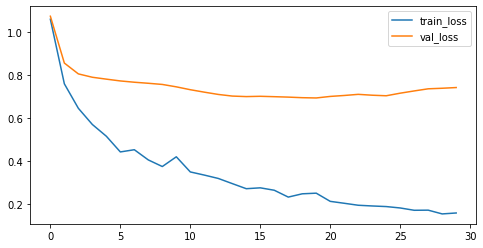

In [ ]:
_ = h_log.plot()

In [ ]:
h_log.to_pandas().val_loss.min()

0.6949282884597778

In [ ]:
c_log.to_pandas().val_loss.min()

0.7812671661376953

In [ ]:
h_model.score_in_batches(hval)
c_model.score_in_batches(cval)

{'loss': 0.8487010598182678}

#### **Prediction**

In [ ]:
dh_surv = h_model.predict_surv_df(hx_test)
dc_surv = c_model.predict_surv_df(cx_test)

In [ ]:
dh_surv = h_model.interpolate(10).predict_surv_df(hx_test)
dc_surv = c_model.interpolate(10).predict_surv_df(cx_test)

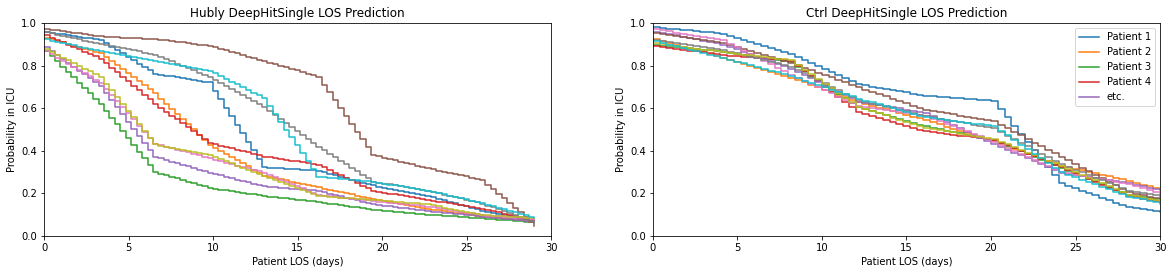

In [ ]:
figsize(20, 18)

ax5 = plt.subplot(425)
ax5.plot(dh_surv.iloc[:, :10], drawstyle='steps-post')
ax5.set_ylabel('Probability in ICU')
ax5.set_xlabel('Patient LOS (days)')
ax5.set_title('Hubly DeepHitSingle LOS Prediction')
ax5.set_xlim([0,30])
ax5.set_ylim([0,1.0])

ax6 = plt.subplot(426)
ax6.plot(dc_surv.iloc[:, :10], drawstyle='steps-post')
ax6.set_ylabel('Probability in ICU')
ax6.set_xlabel('Patient LOS (days)')
ax6.set_title('Ctrl DeepHitSingle LOS Prediction')
ax6.set_xlim([0,30])
ax6.set_ylim([0,1.0])
ax6.legend(['Patient 1','Patient 2', 'Patient 3','Patient 4','etc.'], loc='upper right')

plt.show()

The Hubly drill patients have the same length of stay as the control patients through the DeepHitSingle method.

#### **Evaluation**

In [ ]:
h_ev = EvalSurv(dh_surv, h_durations_test, h_events_test, censor_surv='km')
c_ev = EvalSurv(dc_surv, c_durations_test, c_events_test, censor_surv='km')

**Concordance**

In [ ]:
mymetrics.at['Hubly Concordance', 'DeepHitSingle'] = h_ev.concordance_td('antolini')
mymetrics.at['Ctrl Concordance', 'DeepHitSingle'] = c_ev.concordance_td('antolini')
display(mymetrics)

,Logistic Hazard,PMF,DeepHitSingle,MTLR
Hubly Concordance,0.853261,0.597826,0.880435,NaN
Ctrl Concordance,0.64881,0.613095,0.755952,NaN
Hubly Integrated Brier Score,0.0791265,0.206512,NaN,NaN
Ctrl Integrated Brier Score,0.428325,0.199111,NaN,NaN
Hubly Integrated NBLL,0.2579,0.596536,NaN,NaN
Ctrl Integrated NBLL,1.48617,0.589654,NaN,NaN


**Brier Score**

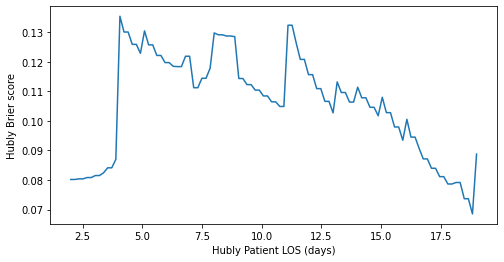

In [ ]:
#Hubly

figsize(8,4)

h_time_grid = np.linspace(h_durations_test.min(), h_durations_test.max(), 100)

h_ev.brier_score(h_time_grid).plot()
plt.ylabel('Hubly Brier score')
_ = plt.xlabel('Hubly Patient LOS (days)')

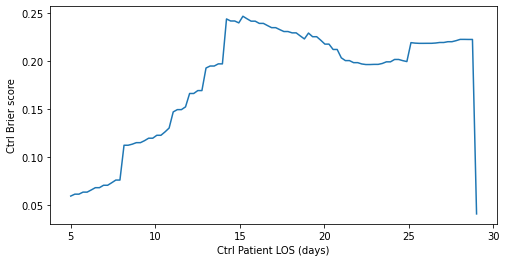

In [ ]:
#Ctrl

c_time_grid = np.linspace(c_durations_test.min(), c_durations_test.max(), 100)

c_ev.brier_score(c_time_grid).plot()
plt.ylabel('Ctrl Brier score')
_ = plt.xlabel('Ctrl Patient LOS (days)')

**Negative binomial log-likelihood**

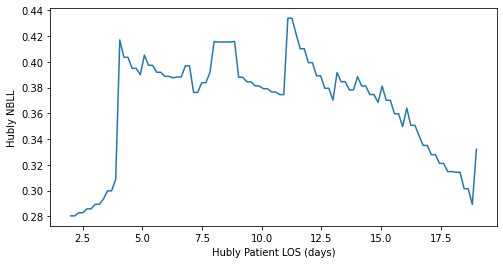

In [ ]:
#Hubly

h_ev.nbll(h_time_grid).plot()
plt.ylabel('Hubly NBLL')
_ = plt.xlabel('Hubly Patient LOS (days)')

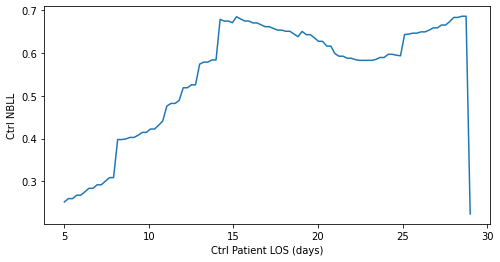

In [ ]:
#Ctrl

c_ev.nbll(c_time_grid).plot()
plt.ylabel('Ctrl NBLL')
_ = plt.xlabel('Ctrl Patient LOS (days)')

**Integrated scores**

In [ ]:
mymetrics.at['Hubly Integrated Brier Score', 'DeepHitSingle'] = h_ev.integrated_brier_score(h_time_grid)
mymetrics.at['Ctrl Integrated Brier Score', 'DeepHitSingle'] = c_ev.integrated_brier_score(c_time_grid)

In [ ]:
mymetrics.at['Hubly Integrated NBLL', 'DeepHitSingle'] = h_ev.integrated_nbll(h_time_grid)
mymetrics.at['Ctrl Integrated NBLL', 'DeepHitSingle'] = c_ev.integrated_nbll(c_time_grid)

display(mymetrics)

,Logistic Hazard,PMF,DeepHitSingle,MTLR
Hubly Concordance,0.853261,0.597826,0.880435,NaN
Ctrl Concordance,0.64881,0.613095,0.755952,NaN
Hubly Integrated Brier Score,0.0791265,0.206512,0.105905,NaN
Ctrl Integrated Brier Score,0.428325,0.199111,0.181102,NaN
Hubly Integrated NBLL,0.2579,0.596536,0.366765,NaN
Ctrl Integrated NBLL,1.48617,0.589654,0.550667,NaN


## **Multi-Task Logistic Regression**

Like DeepHit, MTLR is a PMF parametrization. (Havard, 2019) and (Yu, 2011) proposed MTLR, which is a generalization of the binomial log-likelihood. It jointly models a sequence of binary labels which represent event indicators.



From (Havard, 2019), the binary labels that MTLR jointly models are: $Y_{j}=\mathbb{1}\left\{T^{*} \leq \tau_{j}\right\}$. In other words, $Y=\left(y_{1}, \ldots, y_{m}\right)$ is a sequence with zeros for every time $\tau_{j}$ up to the event time, followed by one's once the event actually happens!

This is expressed by:
$$
\mathrm{P}\left(Y=\left(y_{1}, \ldots, y_{m}\right) \mid \mathbf{x}\right)=\frac{\exp \left[\sum_{k=1}^{m} y_{k} \psi_{k}(\mathbf{x})\right]}{1+\sum_{k=1}^{m} \exp \left[\sum_{l=k}^{m} \psi_{l}(\mathbf{x})\right]}
$$


(Yu, 2011) only considered linear predictors, expressed by: $\psi_{k}(\mathbf{x})=\mathbf{x}^{T} \boldsymbol{\beta}_{k}$.

When (Fotso, 2018) extended this to a neural net, they found the parameters of $\psi_{k}(\mathbf{x})$ through  minimization of the negative binomial log-likelihood. This is written as:

$$f\left(\tau_{j} \mid \mathbf{x}\right)=\mathrm{P}\left(Y=\left(y_{1}, \ldots, y_{m}\right) \mid \mathbf{x}\right)$$

where $y_{k}=\mathbb{1}\{k \geq j\}$.

(Fotso, 2018)'s wrote the MTLR survival function as:

$\begin{aligned} S\left(\tau_{s-1}, \vec{x}\right)=P\left[T \geq \tau_{s-1} \mid \vec{x}\right] &=\sum_{k=s}^{J} P\left[T \in\left[\tau_{k-1}, \tau_{k}\right) \mid \vec{x}\right] \\ &=\sum_{k=s}^{J} \frac{\exp \left(\sum_{j=s}^{J-1}\left(\vec{x} \cdot \vec{\theta}_{j}+b_{j}\right)\right)}{Z(\vec{x})} \\ &=\sum_{k=s}^{J} \frac{\exp ((\vec{x} \cdot \Theta+\vec{b}) \cdot \Delta \cdot \vec{Y})}{Z(\vec{x})} \\ & \end{aligned}$

With the following variables:

$\Theta \Theta=\left[\begin{array}{ccccc}\theta_{1,1} & \theta_{1,2} & \ldots & \theta_{1, J-1} & \theta_{1, J} \\ \theta_{2,1} & \theta_{2,2} & \ldots & \theta_{2, J-1} & \theta_{2, J} \\ & \vdots & \ldots & \ldots & \\ \theta_{p, 1} & \theta_{p, 2} & \ldots & \theta_{p, J-1} & \theta_{p, J}\end{array}\right]=\left[\vec{\theta}_{1}, \vec{\theta}_{2}, \ldots, \vec{\theta}_{J-1}, \vec{\theta}_{J}\right]$, a $\mathbb{R}^{p \times J}$ co- efficients matrix.

$\vec{b}=\left[\begin{array}{llll}b_{1}, & b_{2}, & \ldots & b_{J-1}, & b_{J}\end{array}\right]$, a $\mathbb{R}^{1 \times J}$ coefficients (bias) matrix.
$\Delta=\left[\begin{array}{cccccc}1 & 0 & 0 & \ldots & 0 & 0 \\ 1 & 1 & 0 & \ldots & 0 & 0 \\ \vdots & \vdots & \vdots & \ldots & \vdots & \vdots \\ 1 & 1 & 1 & \ldots & 0 & 0 \\ 1 & 1 & 1 & \ldots & 1 & 0\end{array}\right], \mathrm{ a } \mathbb{R}^{J \times(J+1)}$ triangular matrix.

$Z(\vec{x})=\sum_{j=1}^{J} \exp \left(\sum_{l=j+1}^{J} \vec{\theta}_{l} \cdot \vec{x}+b_{l}\right)$, a normalization constant.

This Fotso 2018 MTLR (which I will now employ) can also be written as:

$$
f\left(\tau_{j} \mid \mathbf{x}\right)=\frac{\exp \left[\sum_{k=j}^{m} \psi_{k}(\mathbf{x})\right]}{1+\sum_{k=1}^{m} \exp \left[\sum_{l=k}^{m} \psi_{l}(\mathbf{x})\right]}=\frac{\exp \left[\phi_{j}(\mathbf{x})\right]}{1+\sum_{k=1}^{m} \exp \left[\phi_{k}(\mathbf{x})\right]}
$$


where $\phi_{j}(\mathbf{x})=\sum_{k=j}^{m} \psi_{k}(\mathbf{x})$.


I can see, that MTLR is actually the same thing as the PMF, the only change being that $\phi_{j}(\mathbf{x})$ is the reverse cumulative sum of the output of network $\psi(\mathbf{x}) \in \mathbb{R}^{m}$.

#### **Label transforms**

In [ ]:
num_durations = 10

In [ ]:
#hubly

h_labtrans = MTLR.label_transform(num_durations)

h_get_target = lambda hdf: (hdf['Patient LOS (days)'].values, hdf['Events'].values)
hy_train = h_labtrans.fit_transform(*h_get_target(hdf_train))
hy_val = h_labtrans.transform(*h_get_target(hdf_val))

htrain = (hx_train, hy_train)
hval = (hx_val, hy_val)



h_durations_test, h_events_test = h_get_target(hdf_test)

In [ ]:
#ctrl

c_labtrans = MTLR.label_transform(num_durations)

c_get_target = lambda cdf: (cdf['Patient LOS (days)'].values, cdf['Events'].values)
cy_train = c_labtrans.fit_transform(*c_get_target(cdf_train))
cy_val = c_labtrans.transform(*c_get_target(cdf_val))

ctrain = (cx_train, cy_train)
cval = (cx_val, cy_val)

c_durations_test, c_events_test = c_get_target(cdf_test)

In [ ]:
c_labtrans.cuts

array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36.])

In [ ]:
h_labtrans.cuts

array([ 0.        ,  3.22222222,  6.44444444,  9.66666667, 12.88888889,
       16.11111111, 19.33333333, 22.55555556, 25.77777778, 29.        ])

#### **Neural Net**

(Fotso, 2018) also applied deep learning to the MTLR which transformed the survival function to the following equation:

$$
S\left(\tau_{s-1}, \vec{x}\right)=\sum_{k=s}^{J} \frac{\exp (\psi(\vec{x}) \cdot \Delta \cdot \vec{Y})}{Z(\psi(\vec{x}))} \quad \text { (N-MTLR - survival) }
$$

Where $\psi: \mathbb{R}^{p} \mapsto \mathbb{R}^{J}$ is the nonlinear transformation using $\vec{x} \in \mathbb{R}^{p}$ feature vector as its input. Its output is a $\mathbb{R}^{J}$ vector whose values are mapped to the $J$ subdivisions of the time axis, and $Z(\psi(\vec{x}))=\sum_{j=1}^{J} \exp \left(\sum_{l=j+1}^{J} \psi(\vec{x})\right)$

In [ ]:
num_nodes = [32, 32]
h_out_features = h_labtrans.out_features
c_out_features = c_labtrans.out_features
batch_norm = True
dropout = 0.1

In [ ]:
#hubly

h_in_features = hx_train.shape[1]
h_net = tt.practical.MLPVanilla(h_in_features, num_nodes, h_out_features, batch_norm, dropout)

In [ ]:
#ctrl

c_in_features = cx_train.shape[1]
c_net = tt.practical.MLPVanilla(c_in_features, num_nodes, c_out_features, batch_norm, dropout)

#### **Training the Model**

In [ ]:
h_model = MTLR(h_net, tt.optim.Adam(0.01), duration_index=h_labtrans.cuts)
c_model = MTLR(c_net, tt.optim.Adam(0.01), duration_index=c_labtrans.cuts)

In [ ]:
batch_size = 256
epochs = 100
callbacks = [tt.cb.EarlyStopping()]

In [ ]:
h_log = h_model.fit(hx_train, hy_train, batch_size, epochs, callbacks, val_data=hval)

0:	[0s / 0s],		train_loss: 2.4837,	val_loss: 2.7832
1:	[0s / 0s],		train_loss: 2.1056,	val_loss: 2.6213
2:	[0s / 0s],		train_loss: 1.8343,	val_loss: 2.4743
3:	[0s / 0s],		train_loss: 1.6984,	val_loss: 2.3947
4:	[0s / 0s],		train_loss: 1.6397,	val_loss: 2.3420
5:	[0s / 0s],		train_loss: 1.5428,	val_loss: 2.2756
6:	[0s / 0s],		train_loss: 1.4578,	val_loss: 2.2128
7:	[0s / 0s],		train_loss: 1.3595,	val_loss: 2.1546
8:	[0s / 0s],		train_loss: 1.2912,	val_loss: 2.1090
9:	[0s / 0s],		train_loss: 1.1440,	val_loss: 2.0478
10:	[0s / 0s],		train_loss: 1.0963,	val_loss: 1.9907
11:	[0s / 0s],		train_loss: 0.9963,	val_loss: 1.9304
12:	[0s / 0s],		train_loss: 0.9078,	val_loss: 1.8723
13:	[0s / 0s],		train_loss: 0.8568,	val_loss: 1.8090
14:	[0s / 0s],		train_loss: 0.8406,	val_loss: 1.7608
15:	[0s / 0s],		train_loss: 0.7711,	val_loss: 1.7350
16:	[0s / 0s],		train_loss: 0.7203,	val_loss: 1.7073
17:	[0s / 0s],		train_loss: 0.7008,	val_loss: 1.6698
18:	[0s / 0s],		train_loss: 0.6470,	val_loss: 1.6376
19:

In [ ]:
c_log = c_model.fit(cx_train, cy_train, batch_size, epochs, callbacks, val_data=cval)

0:	[0s / 0s],		train_loss: 2.8250,	val_loss: 2.5505


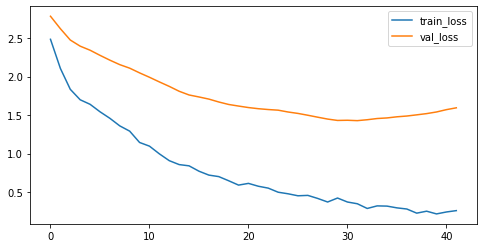

In [ ]:
_ = h_log.plot()

In [ ]:
h_log.to_pandas().val_loss.min()

1.4274896383285522

In [ ]:
c_log.to_pandas().val_loss.min()

2.550482749938965

In [ ]:
h_model.score_in_batches(hval)
c_model.score_in_batches(cval)

{'loss': 2.696159601211548}

#### **Prediction**

In [ ]:
mh_surv = h_model.predict_surv_df(hx_test)
mc_surv = c_model.predict_surv_df(cx_test)

In [ ]:
mh_surv = h_model.interpolate(10).predict_surv_df(hx_test)
mc_surv = c_model.interpolate(10).predict_surv_df(cx_test)

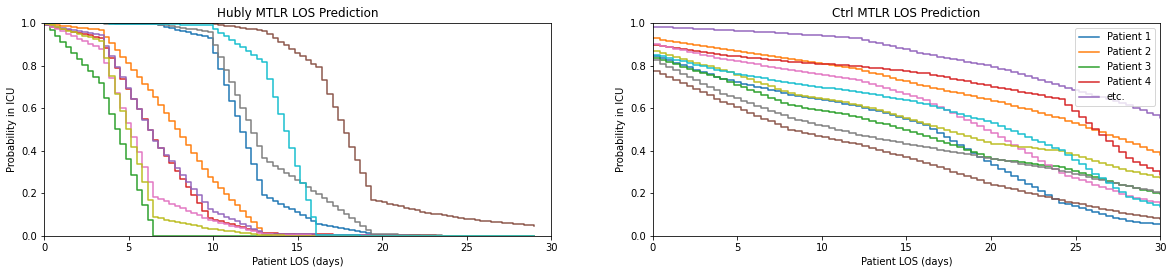

In [ ]:
figsize(20, 18)

ax7 = plt.subplot(427)
ax7.plot(mh_surv.iloc[:, :10], drawstyle='steps-post')
ax7.set_ylabel('Probability in ICU')
ax7.set_xlabel('Patient LOS (days)')
ax7.set_title('Hubly MTLR LOS Prediction')
ax7.set_xlim([0,30])
ax7.set_ylim([0,1.0])


ax8 = plt.subplot(428)
ax8.plot(mc_surv.iloc[:, :10], drawstyle='steps-post')
ax8.set_ylabel('Probability in ICU')
ax8.set_xlabel('Patient LOS (days)')
ax8.set_title('Ctrl MTLR LOS Prediction')
ax8.set_xlim([0,30])
ax8.set_ylim([0,1.0])
ax8.legend(['Patient 1','Patient 2', 'Patient 3','Patient 4','etc.'], loc='upper right')

plt.show()

The Hubly drill patients have significantly less length of stays than the control patients through the DeepHitSingle method.

#### **Evaluation**

In [ ]:
h_ev = EvalSurv(mh_surv, h_durations_test, h_events_test, censor_surv='km')
c_ev = EvalSurv(mc_surv, c_durations_test, c_events_test, censor_surv='km')

**Concordance**

In [ ]:
mymetrics.at['Hubly Concordance', 'MTLR'] = h_ev.concordance_td('antolini')
mymetrics.at['Ctrl Concordance', 'MTLR'] = c_ev.concordance_td('antolini')

**Brier Score**

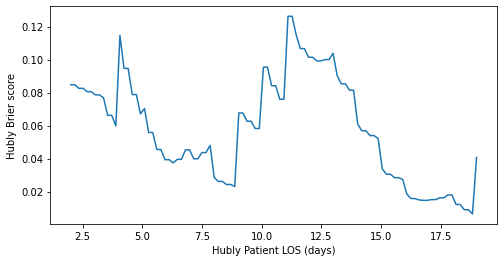

In [ ]:
#Hubly

figsize(8,4)

h_time_grid = np.linspace(h_durations_test.min(), h_durations_test.max(), 100)

h_ev.brier_score(h_time_grid).plot()
plt.ylabel('Hubly Brier score')
_ = plt.xlabel('Hubly Patient LOS (days)')

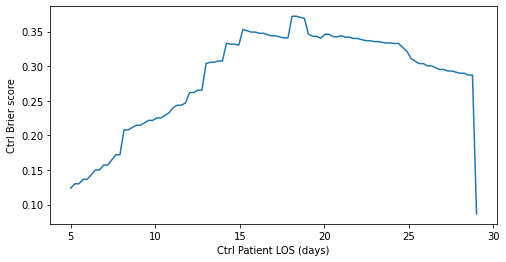

In [ ]:
#Ctrl

c_time_grid = np.linspace(c_durations_test.min(), c_durations_test.max(), 100)

c_ev.brier_score(c_time_grid).plot()
plt.ylabel('Ctrl Brier score')
_ = plt.xlabel('Ctrl Patient LOS (days)')

**Negative binomial log-likelihood**

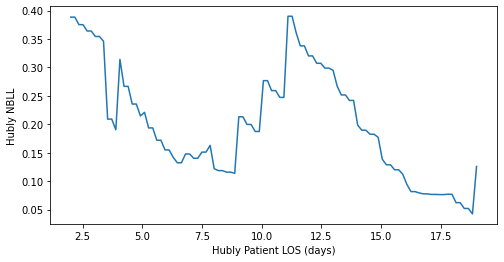

In [ ]:
#Hubly

h_ev.nbll(h_time_grid).plot()
plt.ylabel('Hubly NBLL')
_ = plt.xlabel('Hubly Patient LOS (days)')

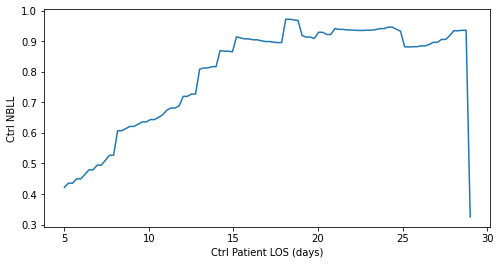

In [ ]:
#Ctrl

c_ev.nbll(c_time_grid).plot()
plt.ylabel('Ctrl NBLL')
_ = plt.xlabel('Ctrl Patient LOS (days)')

**Integrated scores**

In [ ]:
mymetrics.at['Hubly Integrated Brier Score', 'MTLR'] = h_ev.integrated_brier_score(h_time_grid)
mymetrics.at['Ctrl Integrated Brier Score', 'MTLR'] = c_ev.integrated_brier_score(c_time_grid)

In [ ]:
mymetrics.at['Hubly Integrated NBLL', 'MTLR'] = h_ev.integrated_nbll(h_time_grid)
mymetrics.at['Ctrl Integrated NBLL', 'MTLR'] = c_ev.integrated_nbll(c_time_grid)

## **Conclusion**

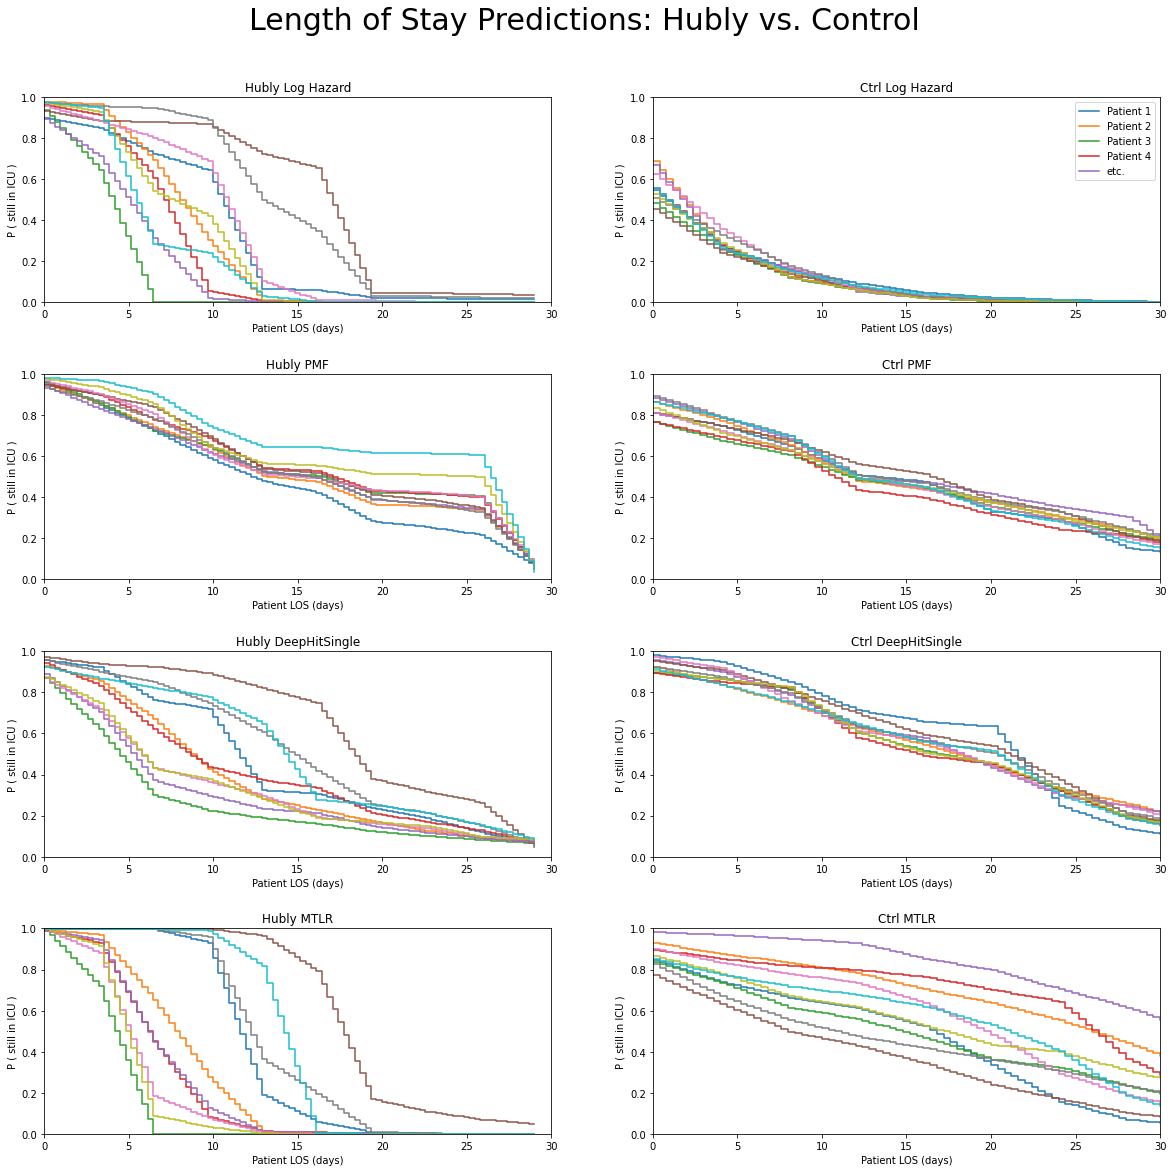

In [ ]:
figsize(20, 18)

ax1 = plt.subplot(421)
ax1.plot(lh_surv.iloc[:, :10], drawstyle='steps-post')
ax1.set_ylabel('P ( still in ICU )')
ax1.set_xlabel('Patient LOS (days)')
ax1.set_title('Hubly Log Hazard')
ax1.set_xlim([0,30])
ax1.set_ylim([0,1.0])

ax2 = plt.subplot(422)
ax2.plot(lc_surv.iloc[:, :10], drawstyle='steps-post')
ax2.set_ylabel('P ( still in ICU )')
ax2.set_xlabel('Patient LOS (days)')
ax2.set_title('Ctrl Log Hazard')
ax2.set_xlim([0,30])
ax2.set_ylim([0,1.0])
ax2.legend(['Patient 1','Patient 2', 'Patient 3','Patient 4','etc.'], loc='upper right')

ax3 = plt.subplot(423)
ax3.plot(ph_surv.iloc[:, :10], drawstyle='steps-post')
ax3.set_ylabel('P ( still in ICU )')
ax3.set_xlabel('Patient LOS (days)')
ax3.set_title('Hubly PMF')
ax3.set_xlim([0,30])
ax3.set_ylim([0,1.0])

ax4 = plt.subplot(424)
ax4.plot(pc_surv.iloc[:, :10], drawstyle='steps-post')
ax4.set_ylabel('P ( still in ICU )')
ax4.set_xlabel('Patient LOS (days)')
ax4.set_title('Ctrl PMF')
ax4.set_xlim([0,30])
ax4.set_ylim([0,1.0])

ax5 = plt.subplot(425)
ax5.plot(dh_surv.iloc[:, :10], drawstyle='steps-post')
ax5.set_ylabel('P ( still in ICU )')
ax5.set_xlabel('Patient LOS (days)')
ax5.set_title('Hubly DeepHitSingle')
ax5.set_xlim([0,30])
ax5.set_ylim([0,1.0])

ax6 = plt.subplot(426)
ax6.plot(dc_surv.iloc[:, :10], drawstyle='steps-post')
ax6.set_ylabel('P ( still in ICU )')
ax6.set_xlabel('Patient LOS (days)')
ax6.set_title('Ctrl DeepHitSingle')
ax6.set_xlim([0,30])
ax6.set_ylim([0,1.0])

ax7 = plt.subplot(427)
ax7.plot(mh_surv.iloc[:, :10], drawstyle='steps-post')
ax7.set_ylabel('P ( still in ICU )')
ax7.set_xlabel('Patient LOS (days)')
ax7.set_title('Hubly MTLR')
ax7.set_xlim([0,30])
ax7.set_ylim([0,1.0])

ax8 = plt.subplot(428)
ax8.plot(mc_surv.iloc[:, :10], drawstyle='steps-post')
ax8.set_ylabel('P ( still in ICU )')
ax8.set_xlabel('Patient LOS (days)')
ax8.set_title('Ctrl MTLR')
ax8.set_xlim([0,30])
ax8.set_ylim([0,1.0])

plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)


plt.suptitle('Length of Stay Predictions: Hubly vs. Control', y=0.97, fontsize=30)

plt.show()

Looking the length of stay prediction charts in each of the 4 method's Prediction sections above, I observe the following:


- In all four methods, Hubly variability is much greater than control variability

- **Logistic Hazard**: the Hubly drill patients appear to have LONGER length of stays than the control patients.

- **PMF**: the Hubly drill patients have SHORTER length of stays than the control patients.

- **DeepHitSingle**: the Hubly drill patients SHORTER in their length of stays compared to the control patients.

- **MTLR**: the Hubly drill patients have SHORTER length of stays than the control patients.

So which model can we rely on the most? Or at all? Let's take a look at our evaluation metrics, for which higher concordance, lower brier score, and lower NBLL all indicate a more accurate model.

In [ ]:
display(mymetrics)

,Logistic Hazard,PMF,DeepHitSingle,MTLR
Hubly Concordance,0.853261,0.597826,0.880435,0.902174
Ctrl Concordance,0.64881,0.613095,0.755952,0.279762
Hubly Integrated Brier Score,0.0791265,0.206512,0.105905,0.0576224
Ctrl Integrated Brier Score,0.428325,0.199111,0.181102,0.285679
Hubly Integrated NBLL,0.2579,0.596536,0.366765,0.200037
Ctrl Integrated NBLL,1.48617,0.589654,0.550667,0.801715


Again, an accurate model is marked by HIGH concordance, LOW Brier Score, and LOW Negative Binomial Log Likelihood.

The more accurate methods: According to our metrics above, MTLR and PMF tie for the highest concordance. And MTLR additionally had the lowest Brier Score and lowest NBLL.

The less accurate methods: DeepHitSingle had the lowest concordance. Logistic Hazard had the highest NBLL. Logistic Hazard and DeepHitSingle just about tie for highest Brier Score.

Based on these evaluation metrics, it seems that MTLR and PMF are ever so slightly more reliable methods than Logistic Hazard and DeepHitSingle for evaluating length of stay for Hubly vs. control patients. These also happen to be the methods which show shorter length of stay for the Hubly patients vs. control (in the hypothetical data!).

## **Bibliography**

### **Papers**

1. David I. Inouye, Eunho Yang, Genevera I. Allen, and Pradeep Ravikumar. A review of multivariate distributions for count data derived from the Poisson distribution. WIREs Comput Stat 2017, 9:e1398. doi: 10.1002/wics.1398 https://blackboard.jhu.edu/bbcswebdav/pid-10473035-dt-content-rid-107900099_2/courses/EN.625.721.8VL3.FA21/wics1398.pdf


2. KIMBERLY F. SELLERS AND GALIT SHMUELI. A FLEXIBLE REGRESSION MODEL FOR COUNT DATA. The Annals of Applied Statistics 2010, Vol. 4, No. 2, 943–961 DOI: 10.1214/09-AOAS306 © Institute of Mathematical Statistics, 2010 https://blackboard.jhu.edu/bbcswebdav/pid-10473035-dt-content-rid-107900100_2/courses/EN.625.721.8VL3.FA21/09-AOAS306.pdf

3. Lucila Ohno-Machado. Modeling Medical Prognosis: Survival Analysis Techniques. Journal of Biomedical Informatics 34, 428–439 (2001) doi:10.1006/jbin.2002.1038.

4. Erin Craig, Chenyang Zhong, and Robert Tibshirani. Survival stacking: casting survival analysis as a classification problem. Stanford University July 29, 2021. https://arxiv.org/pdf/2107.13480v1.pdf

5. Hemant Ishwaran, Udaya B Kogalur, Eugene H Blackstone, Michael S Lauer, et al. Random survival forests. Annals of Applied Statistics, 2(3):841–860, 2008.

6. Weichi Yao, Halina Frydman, Denis Larocque, and Jeffrey S. Simonoff. LTRCforests: Ensemble Methods for Survival Data with Time-Varying Covariates, 2021. R package version 0.5.5.
H˚avard Kvamme, Ørnulf Borgan, and Ida Scheel. Time-to-event prediction with neural networks and Cox regression. arXiv preprint arXiv:1907.00825, 2019.

7. Stephane Fotso. Deep neural networks for survival analysis based on a multi-task framework. arXiv preprint arXiv:1801.05512, 2018.

8. Chun-Nam Yu, Russell Greiner, Hsiu-Chin Lin, and Vickie Baracos. Learning patient-specific cancer survival distributions as a sequence of dependent regressors. In Advances in Neural Information Processing Systems 24, pages 1845–1853. Curran Associates, Inc., 2011.


### **Video**

9. Jiahang Zhong, PhD speaking at ODSC Europe 2019. Published by Open Data Science. https://www.youtube.com/watch?v=VxjfI7vkjhU&t=1817s

### **Code Banks**

10. Egil Martinsson. Weibull Time To Event Recurrent Neural Network. https://github.com/ragulpr/wtte-rnn

11. Haavard Kvamme. A python package for survival analysis and time-to-event prediction with PyTorch,. https://github.com/havakv/pycox

12. Cameron Davidson Pilon. Lifelines GitHub: Survival analysis in Python, including Kaplan Meier, Nelson Aalen and regression. https://pypi.org/project/lifelines/
